<a href="https://colab.research.google.com/github/naveenrajan/CapstoneProject/blob/master/Time_Series_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series
This notebook will cover the basics concepts of time series and showcase building of many types of models on time series data.

#### Setup
Please run the first cell and ensure all the packages are importing without any error. If you face any errors, its likely the package is not installed or installed in a different path. Please re-install using pip or ask for help.

In [0]:
## import packages
import statsmodels

import numpy as np
import pandas as pd

from datetime import datetime
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt, SARIMAX
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [135]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Ads Data
Let's looks at a time series dataset that is based on number of ads shown aggregated at an hourly level.   

We will use the last 45 timestamps as test data and all other timestamps upto then as train data for the models. It's a good practise to split time series data by time to mimic real life production.

In [0]:
ads=pd.read_csv('ads.csv')

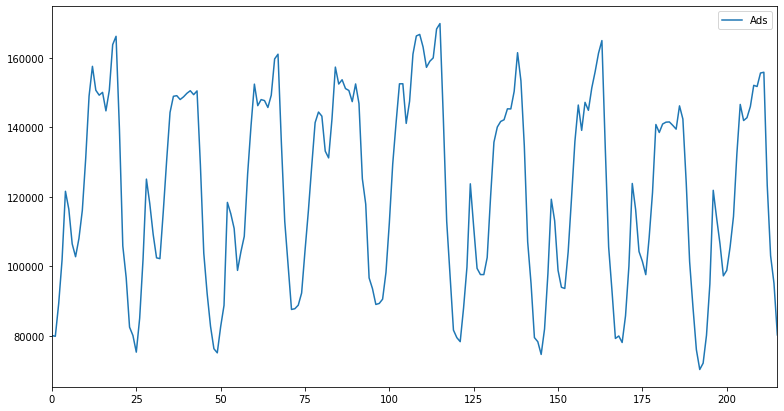

In [137]:
ads.plot(figsize=(13, 7))

#### Dicky-Fuller test
This is a statistical test to determine the presence of a unit root in a time series data that confirms if the series is stationary or not.   

The null hypothesis is the time series is not stationary and has a unit root.   
The alternate hypothesis is the time series is stationary and doesn't have a unit root.

Read more: [https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test](https://en.wikipedia.org/wiki/Dickey%E2%80%93Fuller_test)    
Read more: [https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html)

In [138]:
dftest = adfuller(ads.Ads)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                -7.089634e+00
p-value                        4.444804e-10
#Lags Used                     9.000000e+00
Number of Observations Used    2.060000e+02
Critical Value (1%)           -3.462499e+00
Critical Value (5%)           -2.875675e+00
Critical Value (10%)          -2.574304e+00
dtype: float64

We reject the null hypothesis if the value of the Test Statistic is less than the Critical Value at a significance level (1% or 5% or 10%). In this case it is (for all levels) and hence we reject the null hypothesis and conclude that the series is stationary.

#### DIY Exercise
Read and implement another type of test: KPSS   
It should also prove stationarity.

In [0]:
## code for KPSS

#### AR(p) Model
The autoregression (AR) method models the next step in the time series as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

In [0]:
model = AR(ads.Ads[:-45])
model_ar = model.fit()
ads['Forecast_AR'] = model_ar.predict(len(ads)-45, len(ads))

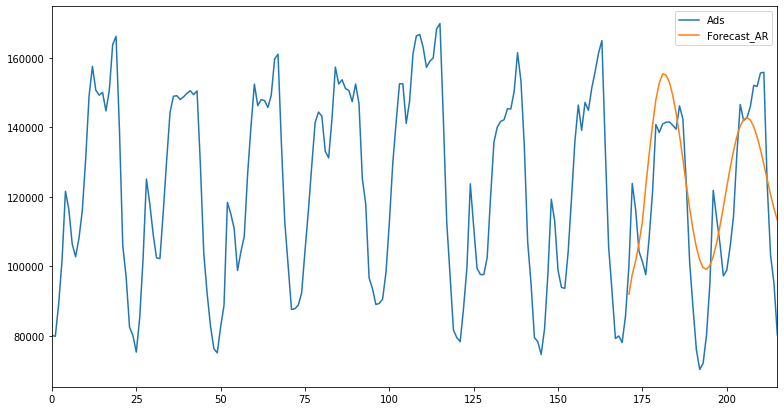

In [141]:
ads[['Time', 'Ads', 'Forecast_AR']].plot(figsize=(13, 7))

#### MA(q) Model
The moving average (MA) method models the next step in the time series as a linear function of the residual errors from a mean process at prior time steps.

A moving average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.

In [0]:
model = ARIMA(ads.Ads[:-45], order=(0, 0, 1))
model_ma = model.fit()
ads['Forecast_MA'] = model_ma.predict(len(ads)-45, len(ads))

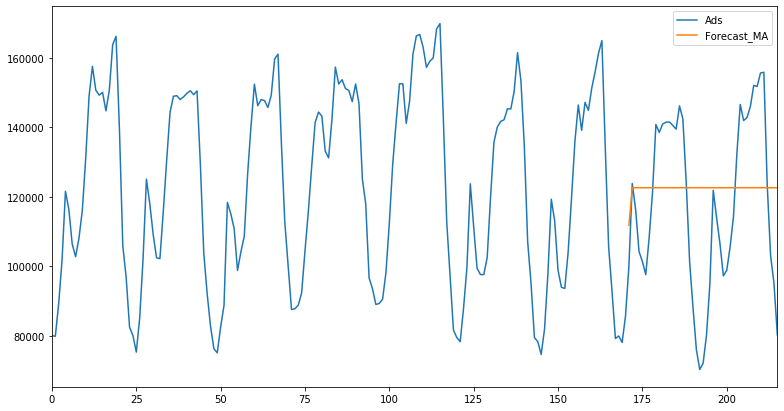

In [143]:
ads[['Time', 'Ads', 'Forecast_MA']].plot(figsize=(13, 7))

#### ACF and PACF plots
Autocorrelation Function (ACF) is a measure of the correlation between the time series with a lagged version of itself.

Partial Autocorrelation Function (PACF) is a measure of the correlation between the time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

These can be used to determine the 'p' and 'q' values.   
The lag value where the PACF chart crosses the upper confidence interval for the first time is an estimate of p.   
The lag value where the ACF chart crosses the upper confidence interval for the first time is an estimate of q.

Read more: [https://en.wikipedia.org/wiki/Autocorrelation](https://en.wikipedia.org/wiki/Autocorrelation)   
Read more: [https://en.wikipedia.org/wiki/Partial_autocorrelation_function](https://en.wikipedia.org/wiki/Partial_autocorrelation_function)

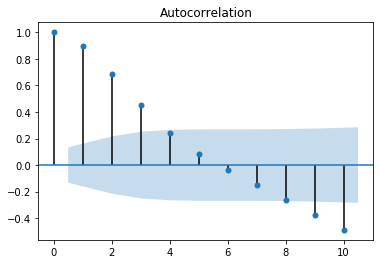

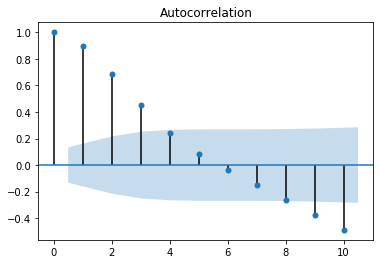

In [171]:
plot_acf(ads.Ads, lags=10)

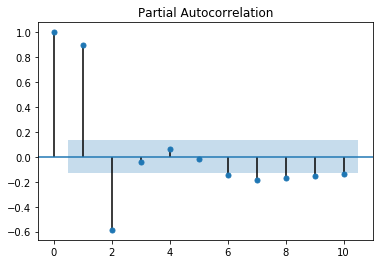

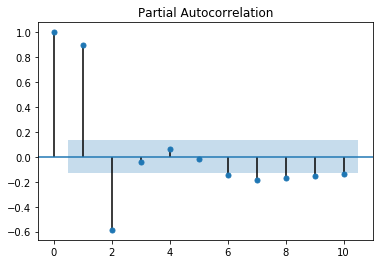

In [172]:
plot_pacf(ads.Ads, lags=10)

#### ARMA(p, q) Model
An ARMA(p,q) model is the combination of AR(p) and MA(q) models.

In [0]:
model = ARIMA(ads.Ads[:-45], order=(2, 0, 2))
model_arma = model.fit()
ads['Forecast_ARMA'] = model_arma.predict(len(ads)-45, len(ads))

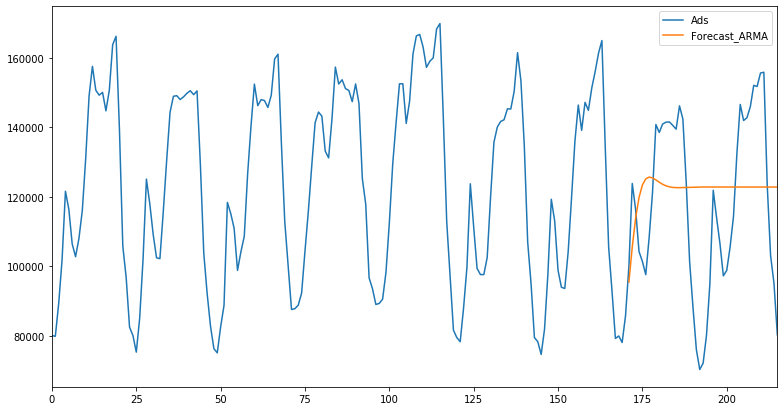

In [187]:
ads[['Time', 'Ads', 'Forecast_ARMA']].plot(figsize=(13, 7))

#### ARIMA(p, d, q) Model
ARIMA models are generally denoted ARIMA(p,d,q) where parameters p, d, and q are non-negative integers, p is the order (number of time lags) of the autoregressive model, d is the degree of differencing (the number of times the data have had past values subtracted), and q is the order of the moving-average model.

Read more: [https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)

In [0]:
model = ARIMA(ads.Ads[:-45], order=(2, 0, 2))
model_arima = model.fit()
ads['Forecast_ARIMA'] = model_arima.predict(len(ads)-45, len(ads))

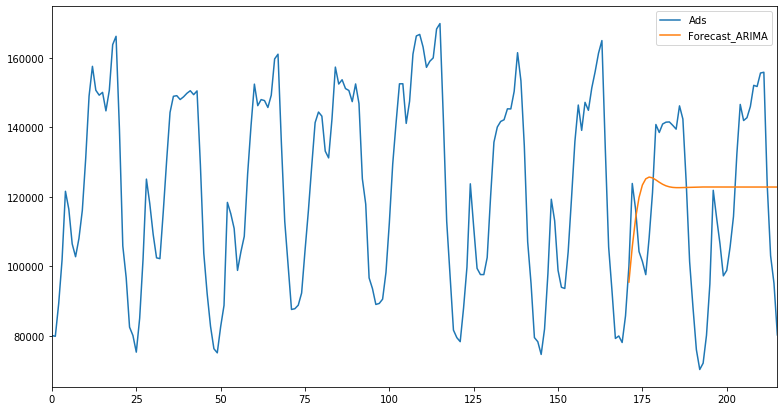

In [194]:
ads[['Time', 'Ads', 'Forecast_ARIMA']].plot(figsize=(13, 7))

#### All models
Lets look at all models together.

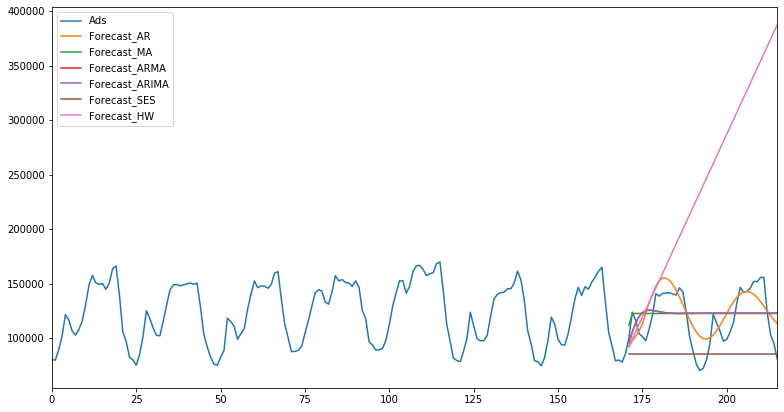

In [195]:
ads.plot(figsize=(13, 7))

#### Simple Exponential Smoothing
Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.

It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

This parameter controls the rate at which the influence of the observations at prior time steps decay exponentially. Alpha is often set to a value between 0 and 1. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

Read more: [https://en.wikipedia.org/wiki/Exponential_smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing)   
Read about Double Exponential Smoothing: [https://en.wikipedia.org/wiki/Exponential_smoothing#Double_exponential_smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing#Double_exponential_smoothing)

In [0]:
model = SimpleExpSmoothing(ads.Ads[:-45])
model_ses = model.fit()
ads['Forecast_SES'] = model_ses.forecast(45)

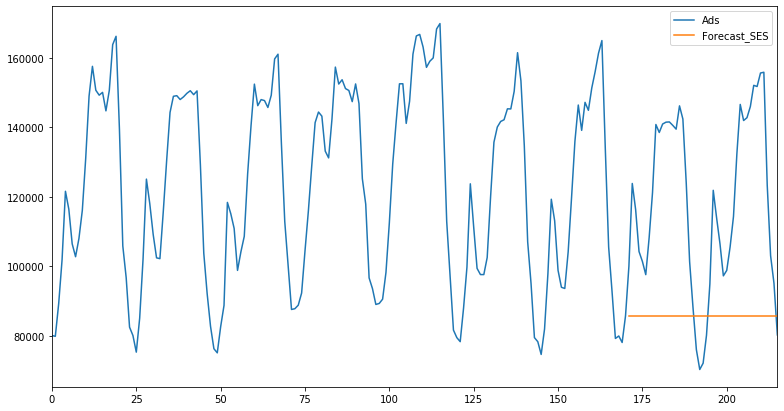

In [197]:
ads[['Time', 'Ads', 'Forecast_SES']].plot(figsize=(13, 7))

#### Holt Winter's
Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends in the univariate time series.   
In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta (b).   
Double Exponential Smoothing with an additive trend is classically referred to as Holt’s linear trend model.

Dampening means reducing the size of the trend over future time steps down to a straight line (no trend).

Triple Exponential Smoothing is an extension of Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.   
This method is sometimes called Holt-Winters Exponential Smoothing, named for two contributors to the method.   
In addition to the alpha and beta smoothing factors, a new parameter is added called gamma (g) that controls the influence on the seasonal component.

In [0]:
model = Holt(ads.Ads[:-45])
model_hw = model.fit()
ads['Forecast_HW'] = model_hw.forecast(45)

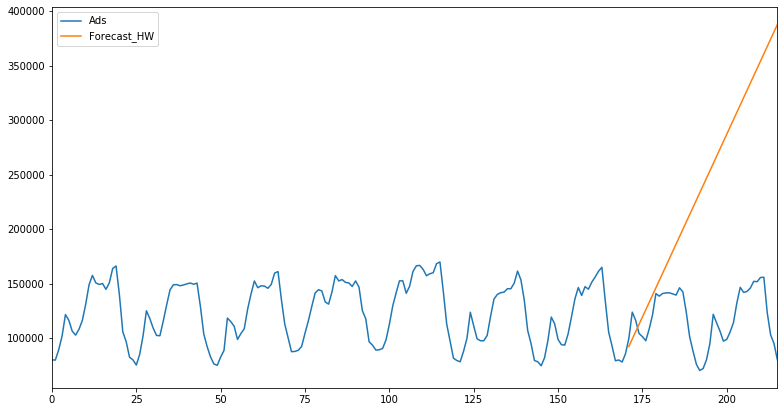

In [199]:
ads[['Time', 'Ads', 'Forecast_HW']].plot(figsize=(13, 7))

#### DIY Exercise
Try out the ExponentialSmoothing model using Holt Winter's.

Read here: [statsmodels.tsa.holtwinters.ExponentialSmoothing](statsmodels.tsa.holtwinters.ExponentialSmoothing)

In [0]:
## code for Exponential Smoothing

#### Robbery data
Let's looks at a time series dataset that is the number of robberies occurred in a state.

In [0]:
df = pd.read_csv('robbery.csv')

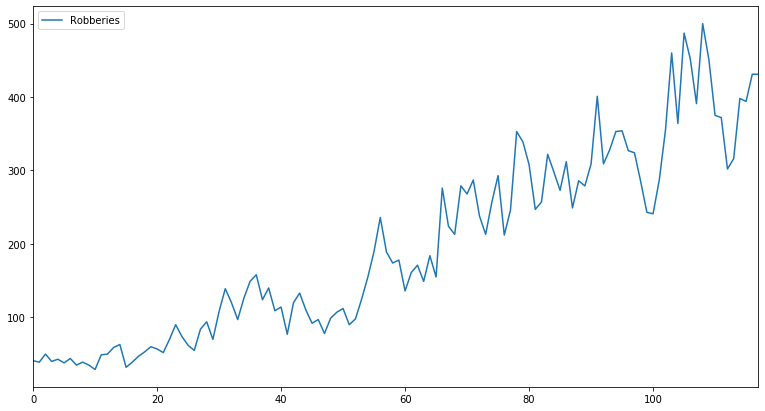

In [157]:
df.plot(figsize=(13, 7))

In [203]:
df.reset_index(drop=True, inplace=True)

dftest = adfuller(df.Robberies)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64

Clearly, this time series is not stationary.

**Dealing with non-stationarity**   
Often it is important to transform the non-stationary time series into a stationary one. There are a few approaches for the same. Log-transformation is one method that can be used. Differencing is another method that we will be using.

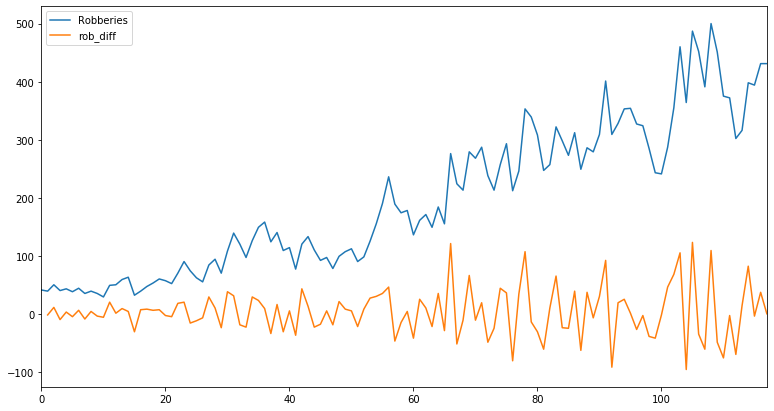

In [204]:
df["rob_diff"] = df.Robberies.diff()
df.plot(figsize=(13, 7))

In [205]:
df.reset_index(drop=True, inplace=True)

dftest = adfuller(df.rob_diff[2:])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                -7.394732e+00
p-value                        7.832209e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.050000e+02
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
dtype: float64

In [209]:
model = SimpleExpSmoothing(df.rob_diff[2:-18])
model_ses = model.fit()
df['Forecast_SES'] = model_ses.forecast(18)

model = Holt(df.Robberies[:-18])
model_hw_linear = model.fit()
df['Forecast_HWLinear'] = model_hw_linear.forecast(18)

model = Holt(df.Robberies[:-18], exponential=True)
model_hw_exp = model.fit()
df['Forecast_HWExp'] = model_hw_exp.forecast(18)

model = Holt(df.Robberies[:-18], damped=True)
model_hw_damp = model.fit()
df['Forecast_HWDamp'] = model_hw_damp.forecast(18)

model = Holt(df.Robberies[:-18], exponential=True, damped=True)
model_hw_expdamp = model.fit()
df['Forecast_HWExpDamp'] = model_hw_expdamp.forecast(18)

model = AR(df.rob_diff[2:-18])
model_ar = model.fit()
df['Forecast_AR'] = model_ar.predict(len(df)-18-3, len(df)-3)

model = ARIMA(df.rob_diff[2:-18], order=(0, 0, 1))
model_ma = model.fit()
df['Forecast_MA'] = model_ma.predict(len(df)-18-3, len(df)-3)

model = ARIMA(df.rob_diff[2:-18], order=(1, 0, 1))
model_arma = model.fit()
df['Forecast_ARMA'] = model_arma.predict(len(df)-18-3, len(df)-3)

model = ARIMA(df.Robberies[:-18], order=(1, 0, 2))
model_arima = model.fit()
df['Forecast_ARIMA'] = model_arima.predict(len(df)-18, len(df))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: invalid value encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


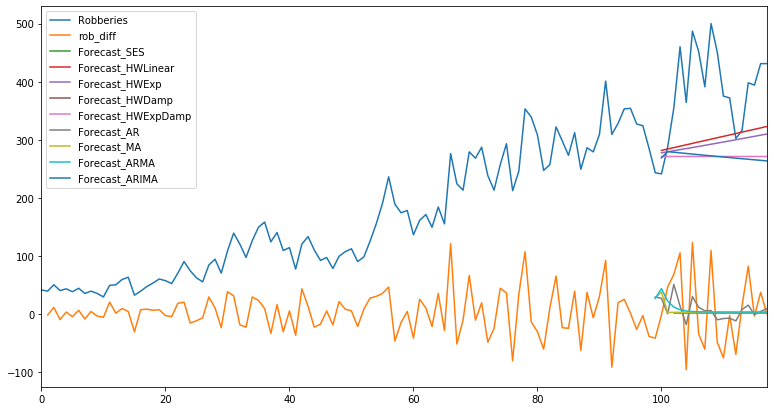

In [210]:
df.plot(figsize=(13, 7))

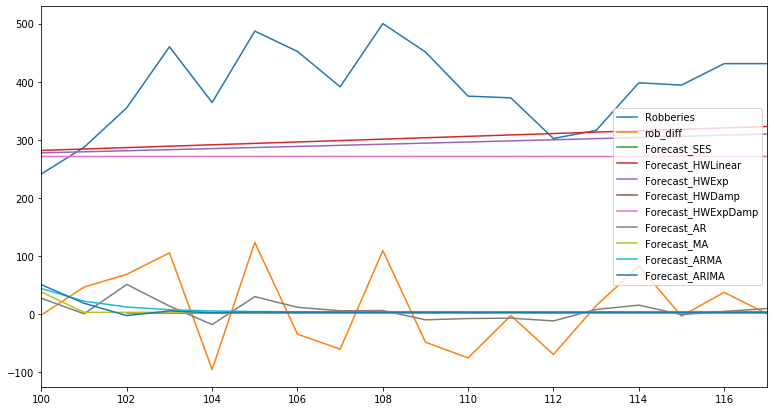

In [208]:
df[-18:].plot(figsize=(13, 7))

#### Energy Index data
Let's looks at a time series dataset that is an index measuring the energy (electricity and gas) production in the US aggregated at a monthly level.

We will use the last 21 months (Jan-2018 to Sep-2019) as test data and all other timestamps upto Dec-2017 as train data for the models. It's a good practise to split time series data by time to mimic real life production.

In [0]:
df = pd.read_csv('energy.csv', index_col='DATE')

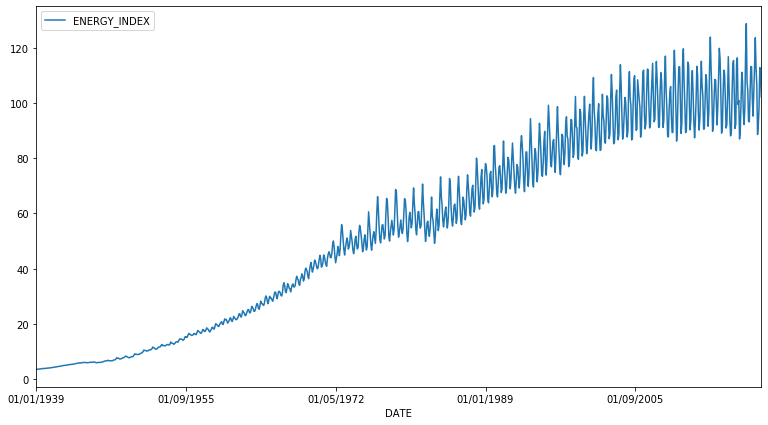

In [165]:
df.plot(figsize=(13, 7))

#### Decomposition
The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying patterns. Lets decompose the energy dataset using an additive model as well as a multiplicative model.

Read more: [https://en.wikipedia.org/wiki/Decomposition_of_time_series](https://en.wikipedia.org/wiki/Decomposition_of_time_series)

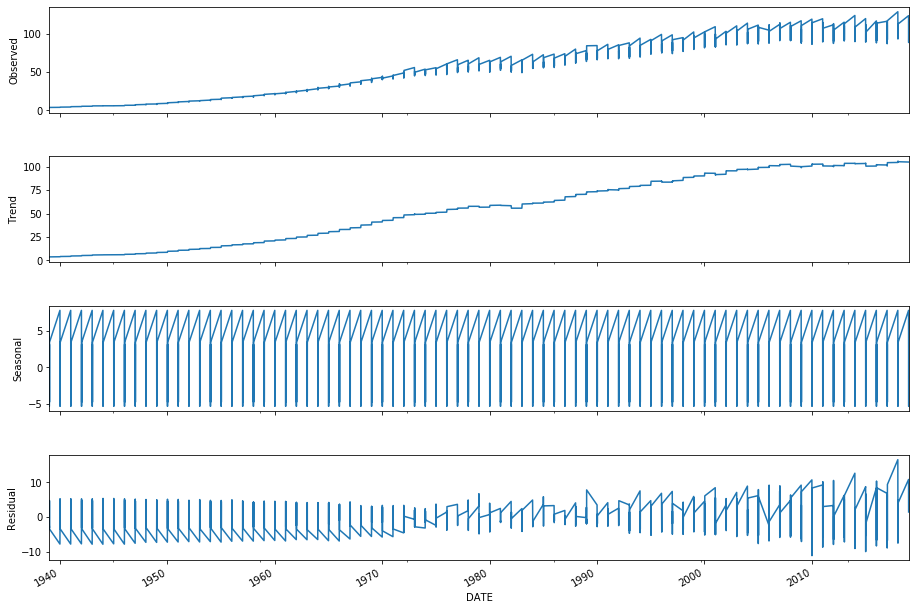

In [166]:
df.index = pd.DatetimeIndex(df.index)
decomp = seasonal_decompose(df['ENERGY_INDEX'], model='additive', freq=12)
fig = decomp.plot()
fig.set_size_inches(14, 10)
plt.show()

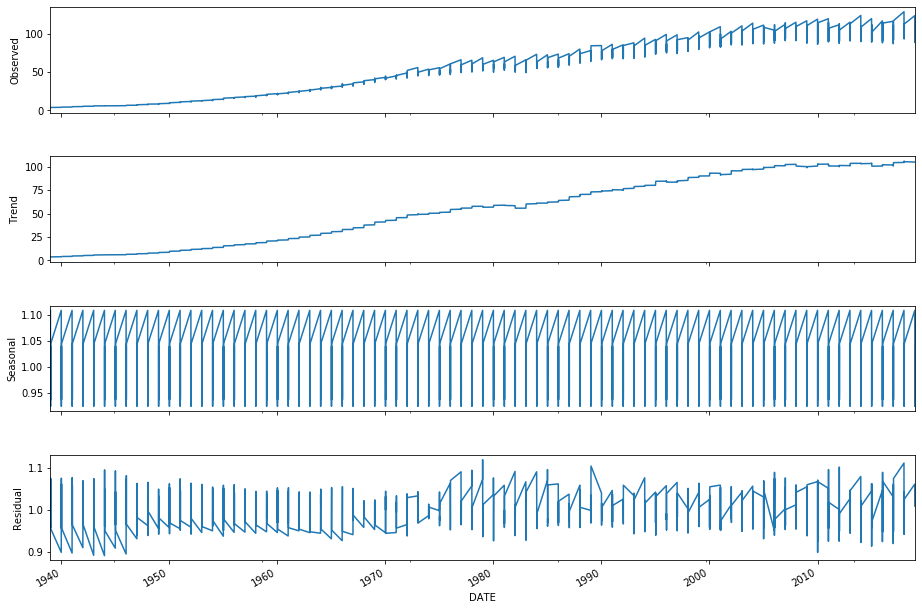

In [167]:
df.index = pd.DatetimeIndex(df.index)
decomp = seasonal_decompose(df['ENERGY_INDEX'], model='multiplicative', freq=12)
fig = decomp.plot()
fig.set_size_inches(14, 10)
plt.show()

#### DIY Exercise
Make this TS stationary. Try to play around with different combinations of Holt and ARIMA parameters. If you face fitting errors, find out why!   
Trying a lot of different combinations of parameters on different datasets along with reading and understanding the outputs, trends and errors will give you the most learnings, so spend as much time on this as possible.

In [0]:
## code for experimenting with this dataset